#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import re

# Load your dataset
salaries = pd.read_csv("/content/Salaries.csv")
# Inspect the first 5 lines
salaries.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [239]:
# The actual length of the dataset (number of rows)

print(f"{len(salaries)} rows")

148654 rows


In [240]:
#The whole column list and there types
print(salaries.columns)
print(salaries.dtypes)

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [241]:
# Checking for any null containing columns

salaries.isna().any() #.isna() return a matrix that checks the boolean value for each variable for all values
                      #.any() makes sure that if at least one value is True then there is a null value

Id                  False
EmployeeName        False
JobTitle            False
BasePay              True
OvertimePay          True
OtherPay             True
Benefits             True
TotalPay            False
TotalPayBenefits    False
Year                False
Notes                True
Agency              False
Status               True
dtype: bool

Columns [BasePay,
OvertimePay,
OtherPay,
Benefits,
Notes,
Status] are all floats meaning I will be assigning 0 to all nan values unless the whole column turn out to be full of nan values

In [242]:
#Checking Notes,Status and Benifits Columns
print(salaries.Notes[~salaries.Notes.isna()]) # empty series
print(salaries.Status[~salaries.Status.isna()]) # empty series
# print(salaries.Benefits[~salaries.Benefits.isna()]) doesnt show an empty series

print(f"The total length of Notes is {len(salaries.Notes)} and null values are {salaries.Notes.isnull().sum()}")
print(f"The total length of Notes is {len(salaries.Status)} and null values are {salaries.Status.isnull().sum()}")
print(f"The total length of Notes is {len(salaries.Benefits)} and null values are {salaries.Benefits.isnull().sum()}")

Series([], Name: Notes, dtype: float64)
Series([], Name: Status, dtype: float64)
The total length of Notes is 148654 and null values are 148654
The total length of Notes is 148654 and null values are 148654
The total length of Notes is 148654 and null values are 36163


The whole columns of Notes and Status are complete of nan values while the Benifits column is partially null

In [243]:
# Dropping Notes and Status Columns
salaries.drop(columns=['Notes','Status'],inplace = True)

#Replacing all nan values for the previous columns with 0
salaries = salaries.fillna(0.0)

In [244]:
# Checking the tidy dataset

# print(salaries.head())
salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco


Basic summary statistics for all columns could be achieved through the describe method.
What is important is identify each column type to understand the output.

For simplicity

      Numerical Types -> min,max,ranges --- mean,median,mode,standard deviation ..etc
      (more general explenation as they tend to be
      devided into central tendencies (e.g mean) and spreads (e.g st. dev.))
      
      Categorical Types -> frequency and proportions

In [245]:
salaries.describe() # Covers general numeric columns

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000
mean,74327.500000,66053.729288,5065.923568,3648.669115,18924.232839,74768.321972,93692.554811,2012.522643
std,42912.857795,42886.711158,11454.256594,8056.515703,17165.279495,50517.005274,62793.533483,1.117538
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,37164.250000,32792.545000,0.000000,0.000000,0.000000,36168.995000,44065.650000,2012.000000
50%,74327.500000,64861.600000,0.000000,811.170000,23214.020000,71426.610000,92404.090000,2013.000000
75%,111490.750000,94605.740000,4657.632500,4235.907500,33468.980000,105839.135000,132876.450000,2014.000000
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


In [246]:
# Some minimum values are in the negatives as I researched the original dataset and did not quite grasp the nature yet plus
# ensuring the integrity of the data , letting it be for now is the safer option

In [247]:
# You can also choose a specific column and a specific statistic you want to shed light upon

# The average TotalPay (the value of the Typical Total pay )

avg_total_pay = salaries.TotalPay.mean()
print(f"The average total pay is {avg_total_pay}$")

The average total pay is 74768.32197169267$


In [248]:
# Finding both minimum and maximum values for the BasePay column

minimum = salaries.BasePay.min()
maximum = salaries.BasePay.max()

print(f"""
minimum base pay is {minimum}$
maximum base pay is {maximum}$
""")


minimum base pay is -166.01$
maximum base pay is 319275.01$



In [249]:
# Find the median and mode in Benefits column
# median being the value at exact half way point (In this case the benifit value that devides the values into two halves), mode being the most reccuring value

Median = salaries.Benefits.median()

print(f"median is {Median}$")

most_frequent = salaries.Benefits.mode() # Zero could mean that alot of workers dont get benifits
print(f"The mode is : {most_frequent[0]}")


median is 23214.02$
The mode is : 0.0


In [250]:
# Understanding how the BasePay varies (standard deviation)

stdev = salaries.BasePay.std()

print(f"The st. dev. is {stdev}") # A number that represent the variation (from the mean , I high number means that the data tend to be further away from the mean)
                                  # Simply put how far the data points are from the center

The st. dev. is 42886.71115804501


In [251]:
# As with the BasePay before For a simple range of TotalPay

minimum_T = salaries.TotalPay.min()
maximum_T = salaries.TotalPay.max()

print(f"""
Total Salary range : [{minimum_T}$ ~ {maximum_T}$]
""")


Total Salary range : [-618.13$ ~ 567595.43$]



In [252]:
# What is the most frequent job title?

title_count = salaries.JobTitle.value_counts().reset_index().rename(columns ={'index':'Title'}) # Returns all titles,their counts and the number of "entries" (titles)
title_count

,Title,JobTitle
0,Transit Operator,7036
1,Special Nurse,4389
2,Registered Nurse,3736
3,Public Svc Aide-Public Works,2518
4,Police Officer 3,2421
...,...,...
2154,CHIEF HOUSING INSPECTOR,1
2155,TRAFFIC SIGNAL OPERATOR,1
2156,COURT COMPUTER FACILITIES COORDINATOR,1
2157,AUTOMOTIVE BODY AND FENDER WORKER SUPERVISOR I,1


In [253]:
# Since the dataset originates from San Francisco, it would serve more purpose for a more diverse set
salaries.Agency.value_counts()

San Francisco    148654
Name: Agency, dtype: int64

In [254]:
# Who in the employee with the highest base pay?
maximum = salaries.BasePay.max()
emp = salaries.EmployeeName[salaries.BasePay == maximum].iloc[0] #.iloc() method retrieves the row at the specified index
print(f"{emp} is the employee with the highest base pay ({maximum}$)")

Gregory P Suhr is the employee with the highest base pay (319275.01$)


In [255]:
# Who is the employee with the highest total salary?
maximum = salaries.TotalPay.max()
emp = salaries.EmployeeName[salaries.TotalPay == maximum].iloc[0]
print(f"{emp} is the employee with the highest salary ({maximum}$)")

NATHANIEL FORD is the employee with the highest salary (567595.43$)


In [256]:
# I would like to check the difference in total salary between the first year recorded and the latest year

grouped_salary_set = salaries.groupby('Year').TotalPay.sum().reset_index()
grouped_salary_set["total_pay_f"] = grouped_salary_set.TotalPay.apply(lambda x: f"{x/1e9:.3f} Billion")
print(grouped_salary_set.head())



   Year      TotalPay    total_pay_f
0  2011  2.594195e+09  2.594 Billion
1  2012  2.724848e+09  2.725 Billion
2  2013  2.918656e+09  2.919 Billion
3  2014  2.876911e+09  2.877 Billion


In [257]:
MIN = grouped_salary_set.total_pay_f[grouped_salary_set.TotalPay == grouped_salary_set.TotalPay.min()].iloc[0]
MAX = grouped_salary_set.total_pay_f[grouped_salary_set.TotalPay == grouped_salary_set.TotalPay.max()].iloc[0]

print(f"total_pay ranges from {MIN} - {MAX}")

Mean = grouped_salary_set.TotalPay.mean()
Median = grouped_salary_set.TotalPay.median()

print(f"Average: {Mean}$, Median = {Median}$")

stdev = grouped_salary_set.TotalPay.std()

print(f"The standard deviation {stdev}$")

total_pay ranges from 2.594 Billion - 2.919 Billion
Average: 2778652533.5950003$, Median = 2800879575.8500004$
The standard deviation 148520634.59091514$


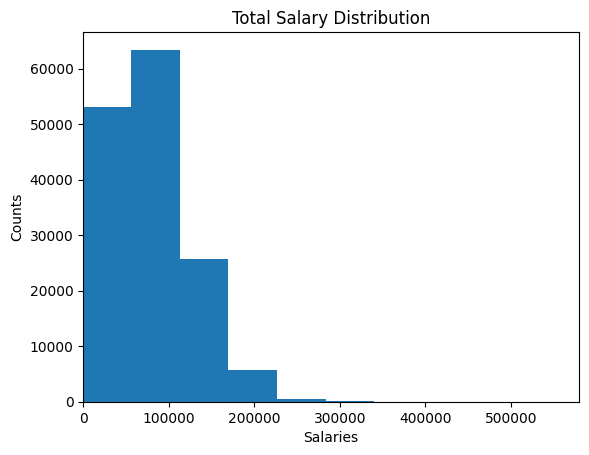

<Figure size 640x480 with 0 Axes>

In [258]:
# How is the TotalPay column distributed

plt.hist(salaries.TotalPay)
plt.xlabel("Salaries")
plt.ylabel("Counts")
plt.title("Total Salary Distribution")
plt.xlim([0, 580000])
plt.show()
plt.clf()


The distribution showcases a right skew, it would be important to compare the mean and median, as it is safer to use the median an indicator of the "typical" salary for skewed data (visually -> with a tail).


In [259]:
avg = salaries.TotalPay.mean()
print(f"The average {avg}$")
median = salaries.TotalPay.median()
print(f"The median  {median}$")

The average 74768.32197169267$
The median  71426.60999999999$


In [260]:
# What is the proportion of employees in different departments
pattern = r".*department.*" # regex (. -> a wildcard for any thing , * means appearing 0 or more times )
                            # (department is literally matched is this case)
departments = salaries.JobTitle[salaries.JobTitle.str.contains(pattern, case=False)]

departments = departments.str.extract(r'\((.*?)\)', expand=False)
# \ escspes ( to be matched literally, () evaluates whats inside to be grouped with both ( and )
#  ? in this case suggests that the preceeding pattern is optional, doesnt appear or appears 1 time

departments = departments.str.lower()  # making sure letter casing is in line
departments = departments.str.strip()  # striping any whitespace characters
departments = departments.dropna()     # removing nan values

print(departments.value_counts())
counts = list(departments.value_counts())
print(counts)

department_counts = dict(zip(departments.value_counts().index, counts))
print(department_counts)



police department    712
fire department       53
Name: JobTitle, dtype: int64
[712, 53]
{'police department': 712, 'fire department': 53}


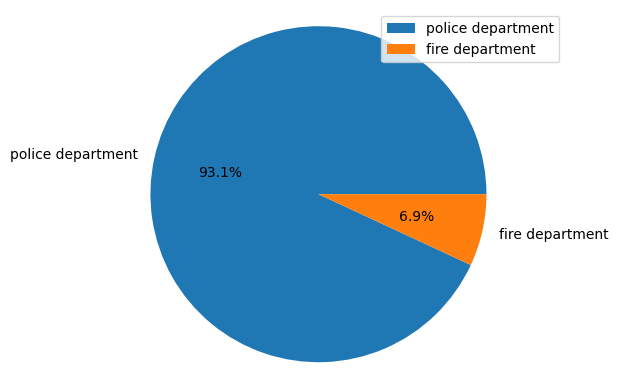

<Figure size 640x480 with 0 Axes>

In [261]:
# Visualizing the proportions of both department using a pie chart
plt.pie(counts,labels = department_counts,autopct = '%0.1f%%') # autopct shows the percentage with different formats available
plt.legend(department_counts)
plt.axis("equal")
plt.show()
plt.clf()

In [262]:
# Following the department comparison, it is time to compare the average salaries across different groups
job_title_grouped = salaries.groupby('JobTitle').TotalPay.mean().reset_index()

# What are both the highest average job title and the lowest ?
Max = job_title_grouped.TotalPay.max()
Min = job_title_grouped.TotalPay.min()
HJ = job_title_grouped.JobTitle[job_title_grouped.TotalPay == Max].iloc[0]
MJ = job_title_grouped.JobTitle[job_title_grouped.TotalPay == Min].iloc[0]

print(f"""
The Highest average was {Max}$ Job Title: {HJ}

The Lowesr average was {Min}$ Job Title: {MJ}
""")



 
The Highest average was 399211.275$ Job Title: GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY

The Lowesr average was 0.0$ Job Title: Drug Court Coordinator



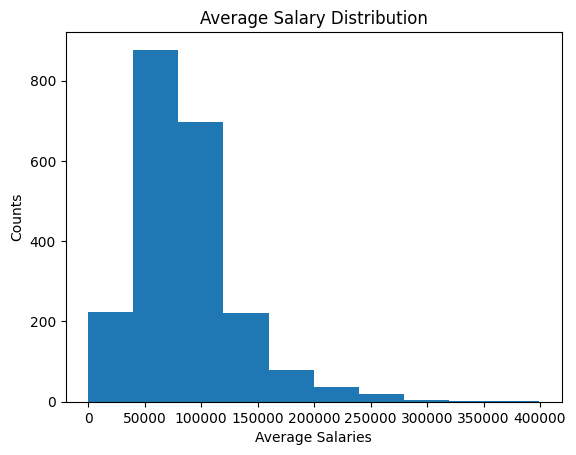

<Figure size 640x480 with 0 Axes>

In [263]:
plt.hist(job_title_grouped.TotalPay)
plt.xlabel("Average Salaries")
plt.ylabel("Counts")
plt.title("Average Salary Distribution")
plt.show()
plt.clf()

What is the relationship between the TotalPay and the BasePay, since they are both continous nemrics , how do they "correlate"?

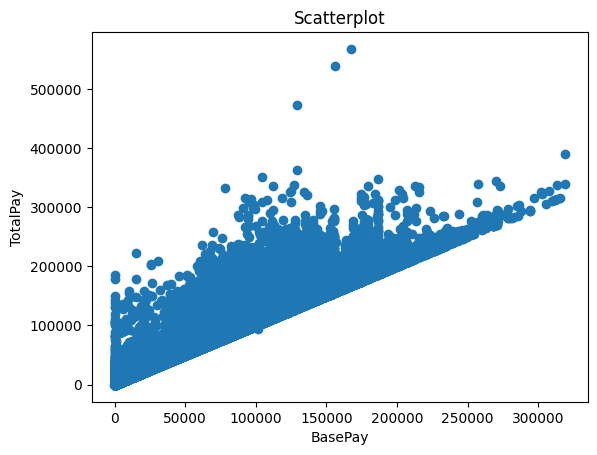

<Figure size 640x480 with 0 Axes>

In [264]:
# Plotting the scatterplot

plt.scatter(salaries.BasePay,salaries.TotalPay)
plt.xlabel("BasePay")
plt.ylabel("TotalPay")
plt.title("Scatterplot")
plt.show()
plt.clf()

A known trend is seen in the plot --> A positive Linear association between them

To quantify that, pearson correlation is used from scipy.stats

In [265]:
pval, st = pearsonr(salaries.BasePay,salaries.TotalPay)

print(pval)

# A high number near 1 suggest a very strong linear relationship as peaerson correlation coeff only works
# for linear relationships (meaning that the plot could indicate a relationship other than linear yet a low values here)

0.9546925905788393


#Summary Insights:



- This dataset contains 148654 entries, 93.1 % recorded titles where from the Police department and only 6.9% from the fire department.

---------------------------
- The BasePay ranged from [-166.01\$  - 319275.01\$ ].
- The TotalPay ranged from [-618.13\$ - 567595.43\$].

- The Typical Total Salary was 71426.60999999999$ (Median).

- The most frequent Benefits Value was 0.0$ (Do many people work without additional benefits pay?).
---------------------------

- The Transit Operator role seems to be where the majority of the people specilize in.
---------------------------
- The years recorded where 2012 - 2014
where the total salary ranged from [2.594 Billion\$ - 2.919 Billion\$].

- 2013 was the year with the highest summed up salary which was approximated to be around 2.919 Billion dollars !

---------------------------
- On average the most wealthiest job was the "GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY" contrary to the "Drug Court Coordinator".
---------------------------
- The BasePay and TotalPay seem to have a strong positive linear relationship, which indicates that the higher the BasePay the higher the TotalPay (total salary).

# Thank you for your time.
Yaser Alshuaybat